<a href="https://colab.research.google.com/github/Anwar996/network-science/blob/main/02-linear-regression/LinearRegression_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First Name: Anwar

Last Name: Ibrahim

group: ISSA

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Task 1 (3 points)

Consider the following toy dataset:

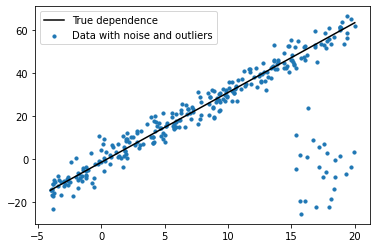

In [2]:
true_function = lambda x: 3.25 * x - 1.47
noize_function = lambda x: (
    np.random.normal(size=len(x)) * 4. +
    np.where(
        x < 15,
        0.,
        -60 + np.random.normal(size=len(x)) * 10
    ) * (np.random.uniform(size=len(x)) < 0.4).astype(int)
)
limits = (-4., 20.)

def generate_dataset(N=300):
  x = np.random.uniform(*limits, size=N)
  y = true_function(x) + noize_function(x)

  return x[:,None], y

X, y = generate_dataset()

x = np.linspace(*limits, 101)
plt.plot(x, true_function(x), c='black', label='True dependence')
plt.scatter(X, y, s=10, label='Data with noise and outliers')
plt.legend();

Implement a linear model $\hat y(x|w) = w_1\cdot x + w_0$ with MAE loss:
$$\text{MAE}(w) = \frac{1}{N}\sum_{i=1}^N\left|y_i - \hat y(x_i|w)\right|,$$
using gradient descent optimization in `numpy`.

*Hint: introduce a constant feature to account for the bias term to make the formulas simpler.*

Plot the learning curve and the final fit. Also, fit the same data with `sklearn`'s `LinearRegression`, and compare the two fits on the same plot. What do you observe? Write a short comment.

In [19]:
ones=np.ones(X.shape)
#X.T.shape

In [21]:
w1= np.random.random()*0.01
w0= np.random.random()*0.01
LR= 0.0001
epoches= 5000

y_= y.reshape(300,1)
for _ in range(epoches):
  Y_pr= w1*X+ w0
  dw1= (np.dot(X.T, np.sign(Y_pr-y_)))/len(X)
  w1-= LR* dw1
  dw0= (np.dot(ones.T,np.sign(Y_pr-y_)))/len(X)
  w0-= LR *dw0

In [22]:
w1,w0

(array([[2.75387635]]), array([[0.20423094]]))

In [23]:
from sklearn import linear_model

LinearReg= linear_model.LinearRegression().fit(X,y_)
w1_r, w0_r =LinearReg.coef_, LinearReg.intercept_

def MAEPredict(x):
  return w0+x*w1

def MSEPredict(x):
  return w0_r+x*w1_r

def drawPlots():
  x = np.linspace(*limits, 101)
  x=x.reshape(101,1)
  plt.plot(x, true_function(x), c='black', label='True dependence')
  plt.plot(x, MAEPredict(x), c='RED', label='MAE dependence')
  plt.plot(x, MSEPredict(x), c='ORANGE', label='MSE dependence')
  plt.scatter(X, y, s=10, label='Data with noise and outliers')
  plt.legend()

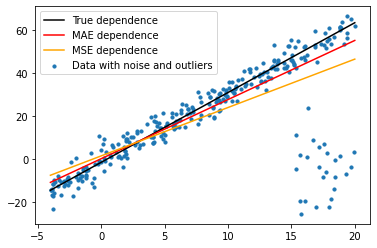

In [24]:
drawPlots()

## Task 2 (2 + 1 points)

* Wrap your solution from the previous task into a class. Plot the learning curve and the final fit. Compare and comment your results with the previos ones. **(2 points)**

* Make it possible to choose a loss function. **(1 point)**

In [7]:
from sklearn.base import BaseEstimator, RegressorMixin

In [60]:
class LinearRergessionSGD(BaseEstimator, RegressorMixin):
    def __init__(self, Loss= "MAE", LR=0.0001, epoches= 5000):
      self.Loss= Loss
      self.LR= LR
      self.epoches= epoches
      self.w1= np.random.random()*0.01
      self.w0= np.random.random()*0.01

    def fit(self, x, y):
        y_= y.reshape(y.shape[0],1)
        ones=np.ones(x.shape)
        if self.Loss=="MAE":
          for _ in range(epoches):
            Y_pr= self.w1*x+ self.w0
            dw1= (np.dot(x.T, np.sign(Y_pr-y_)))/len(x)
            self.w1 -= LR* dw1
            dw0= (np.dot(ones.T,np.sign(Y_pr-y_)))/len(x)
            self.w0 -= LR *dw0

        elif self.Loss== "MSE":
          LinearReg_= linear_model.LinearRegression().fit(x,y)
          self.w1, self.w0 =LinearReg_.coef_, LinearReg_.intercept_
        else:
          print("the loss function is unvalied please choose either MAE or MSE")


    def predict(self, x):
        return self.w0 + x * self.w1
    
    def fit_predict(self, x, y):
      self.fit(x, y)
      return self.predict(x)

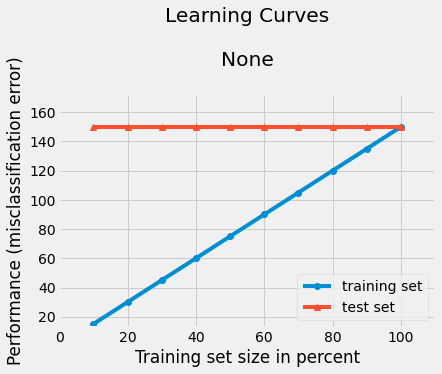

In [61]:
#draw learning curve
from mlxtend.plotting import plot_learning_curves
X_train, X_test = X[:150], X[150:]
y_train, y_test = y[:150], y[150:]

clfMAE = LinearRergessionSGD()

plot_learning_curves(X_train, y_train, X_test, y_test, clfMAE)
plt.show()

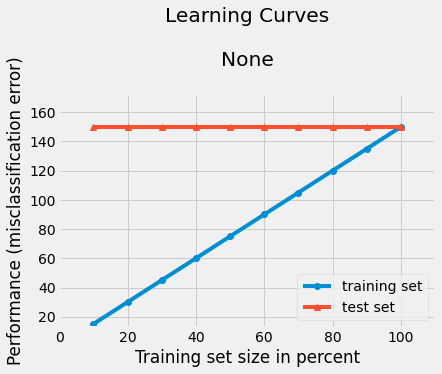

In [62]:
#draw learning curve
from mlxtend.plotting import plot_learning_curves
X_train, X_test = X[:150], X[150:]
y_train, y_test = y[:150], y[150:]

clfMSE = LinearRergessionSGD("MSE")
clfMSE.fit(X,y)

plot_learning_curves(X_train, y_train, X_test, y_test, clfMSE)
plt.show()

In [63]:
def drawPlotsModel():
  clfMAE.fit(X,y)
  clfMSE.fit(X,y)
  x = np.linspace(*limits, 101)
  x=x.reshape(101,1)
  plt.plot(x, true_function(x), c='black', label='True dependence')
  plt.plot(x, clfMAE.predict(x), c='RED', label='Model MAE dependence')
  plt.plot(x, clfMSE.predict(x), c='ORANGE', label='Model MSE dependence')
  plt.scatter(X, y, s=10, label='Data with noise and outliers')
  plt.legend()

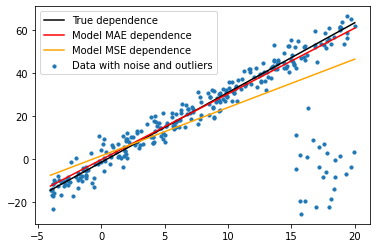

In [64]:
drawPlotsModel()

In [65]:
clfMSE = LinearRergessionSGD()
clfMSE.fit(X,y)